## Data Preperation

In [55]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import scipy.stats as sci
import seaborn as sns

In [56]:
# Create Dataframe
sausages_df = pd.read_csv('../data/processed/sausages_df.csv')
sausages_df.head()

,id,type,rating,dibl,dibu,song,episode,episodeID,episodeType,episodeLength,cleaned_rating,rating_numeric,dibl_copy,dibl_numeric
0,1,Big Mac,3/5,Not Done,1,- No Song -,Big Mac Sausage,f5wvSQdkgXA,Standard,04:37,3,3.0,Not Done,NaN
1,2,Spaghetti and Meatballs,2/5,Not Done,1,- No Song -,Spaghetti ans Meatballs Sausage,qNZ08y8d7RY,Standard,04:02,2,2.0,Not Done,NaN
2,3,Entire KFC Big Box Meal,5/5,Not Done,1,- No Song -,Entire KFC Big Box Meal Sausage,Ve9mlKn4FTs,Standard,02:51,5,5.0,Not Done,NaN
3,4,Sushi,0/5,Not Done,1,- No Song -,Sushi Sausage,qOdHN0k4N34,Standard,02:30,0,0.0,Not Done,NaN
4,5,Pizza Rolls,1/5,Not Done,0,- No Song -,Pizza Rolls Sausage,CVn4PMK1XvM,Standard,02:45,1,1.0,Not Done,NaN


In [57]:
sausages_df.describe()

,id,dibu,rating_numeric,dibl_numeric
count,534.000000,534.000000,513.000000,382.000000
mean,267.301498,0.413858,2.181287,2.363874
std,154.040603,0.492985,4.809991,1.564804
min,1.000000,0.000000,-100.000000,0.000000
25%,134.250000,0.000000,1.000000,1.000000
50%,267.500000,0.000000,2.500000,2.000000
75%,400.750000,1.000000,4.000000,4.000000
max,534.000000,1.000000,6.000000,6.000000


## Cumulative Score

In [66]:
def cum_score_calc(row):
    if pd.isna(row['rating_numeric']) or pd.isna(row['dibl_numeric']):
        return np.NaN
    else:
        return row['rating_numeric'] + row['dibl_numeric']
    
sausages_df['cum_score'] = sausages_df.apply(cum_score_calc, axis=1)
sausages_df.sort_values(by='rating_numeric', ascending=False, inplace=True)


In [75]:
table_cols = ['type', 'rating_numeric', 'dibl_numeric', 'cum_score']
qualified_sausages = sausages_df.dropna(subset=['cum_score'])
qualified_sausages.sort_values(by='cum_score', ascending=False, inplace=True)
qualified_sausages[table_cols].head(5)

C:\Users\rosem\AppData\Local\Temp\ipykernel_5532\3975648925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified_sausages.sort_values(by='cum_score', ascending=False, inplace=True)


,type,rating_numeric,dibl_numeric,cum_score
348,Sashimi Party Tray,6.0,4.0,10.0
500,Kidneys Sausage,5.0,5.0,10.0
516,Tiger Skin Chicken Feet,5.0,5.0,10.0
92,McDonald's McRib,5.0,5.0,10.0
266,Peppermint Candy Cane,5.0,4.0,9.0


In [76]:
qualified_sausages[table_cols].tail(5)

,type,rating_numeric,dibl_numeric,cum_score
284,Coffee Beans,0.0,0.0,0.0
248,Cricket,0.0,0.0,0.0
503,Caffeine,0.0,0.0,0.0
103,Mayonaise,0.0,0.0,0.0
510,Hákarl (Fermented Shark),-100.0,4.0,-96.0


The shark is an outlier and should not be counted.

In [79]:
qualified_sausages = qualified_sausages[qualified_sausages['rating_numeric'] != -100.0]

In [84]:
# Get the value counts as a DataFrame for easier plotting
value_counts_df = qualified_sausages[['rating_numeric', 'dibl_numeric']].value_counts().reset_index(name='count')

value_counts_df

,rating_numeric,dibl_numeric,count
0,4.0,1.0,18
1,2.0,1.0,15
2,5.0,1.0,13
3,0.0,5.0,13
4,3.0,3.0,12
...,...,...,...
69,0.5,5.0,1
70,0.5,4.0,1
71,0.5,2.5,1
72,0.0,1.5,1


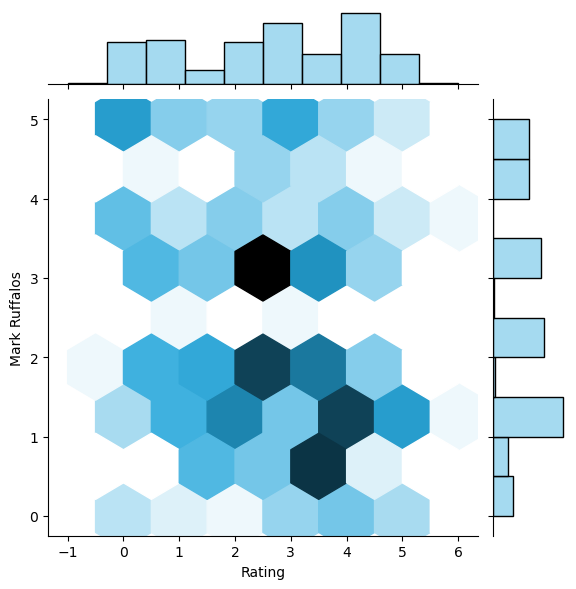

In [155]:
# Create the main jointplot
g = sns.jointplot(
    data=qualified_sausages,
    x='rating_numeric', 
    y='dibl_numeric', 
    kind='hex', 
    color='skyblue',
)

# Show the plot
plt.xlabel("Rating")
plt.ylabel("Mark Ruffalos")
plt.savefig("../visuals/sausage_distribution_hex.png", format="png")
plt.show()


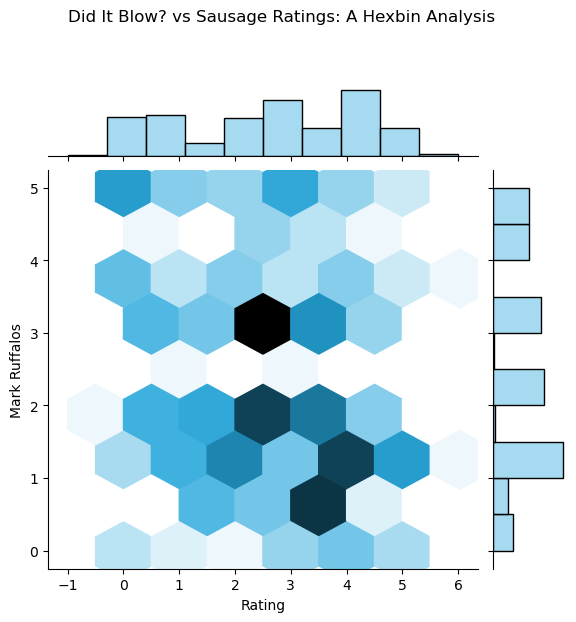

In [104]:
# Create the main jointplot
g = sns.jointplot(
    data=qualified_sausages,
    x='rating_numeric', 
    y='dibl_numeric', 
    kind='hex', 
    color='skyblue',
)

# Show the plot
plt.xlabel("Rating")
plt.ylabel("Mark Ruffalos")

# Add the title using fig.suptitle
g.figure.suptitle('Did It Blow? vs Sausage Ratings: A Hexbin Analysis', y=1.03)

# Adjust the position of the colorbar and margins if needed
plt.subplots_adjust(top=0.9)  # Adjusts spacing so the title fits

plt.show()

In [111]:
# Get all ranked sausages
rated_sausages = sausages_df[~(pd.isna(sausages_df['rating_numeric'])) & (sausages_df['rating'] != "-100/5")]
rated_sausages 

,id,type,rating,dibl,dibu,song,episode,episodeID,episodeType,episodeLength,cleaned_rating,rating_numeric,dibl_copy,dibl_numeric,cum_score
493,495,Menthol,-1/5,2,0,Big Girls Don't Cry,Menthol Sausage,9IB5Rg5kBhg,Standard,05:35,-1,-1.0,2/5 Mark Ruffalos,2.0,1.0
184,185,Cotton Candy,0/5,Not Done,0,- No Song -,Cotton Candy Sausage,nxraLRC4Jz8,YouTube Comments Suggestions,01:00,0,0.0,Not Done,NaN,NaN
379,380,Geoduck,0/5,3,1,Hot For Teacher,"It's not what you think it is, it's Geoduck Sa...",jk-9AhcxKVI,Standard,05:58,0,0.0,3/5 Mark Ruffalos,3.0,3.0
235,236,Diet Coke and Mentos,0/5,Not Done,0,- No Song -,Diet Coke and Mentos Sausage,jUFVY-5T-ck,PoopTube Comments Suggestions,01:01,0,0.0,Not Done,NaN,NaN
365,366,SweeTarts,0/5,5,1,Fat Lip,SweeTarts Sausage,aTYLYIfDMxM,Standard,04:50,0,0.0,5/5 Mark Ruffalos,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,241,Ceviche,5/5,2,1,I Ran,Ceviche Sausage,EdJMTzKmWjs,Standard,04:30,5,5.0,2/5 Mark Ruffalos,2.0,7.0
236,237,Pigs in a Blanket,5/5,0,1,Jumper,Pigs in a Blanket Sausage,VYrcXQs-avc,Mrs. Sausage Makes a Sausage,05:09,5,5.0,0/5 Mark Ruffalos,0.0,5.0
500,502,Kidneys Sausage,5/5,5,0,Rich Lips,Kidneys Sausage,OY1NCeIGNW4,Standard,05:52,5,5.0,5/5 Mark Ruffalos,5.0,10.0
348,349,Sashimi Party Tray,6/5,4,0,Pompeii,Sashimi Party Tray Sausage,z7NU89ilQ4I,Standard,05:42,6,6.0,4/5 Mark Ruffalos,4.0,10.0


In [113]:
print(rated_sausages['rating_numeric'].value_counts())

rating_numeric
 0.0    89
 4.0    85
 1.0    66
 3.0    64
 2.0    62
 5.0    45
 3.5    36
 2.5    21
 1.5    18
 0.5    12
 4.5    11
 6.0     2
-1.0     1
Name: count, dtype: int64


In [115]:
print(rated_sausages[rated_sausages['dibu'] == 0]['rating_numeric'].value_counts())

rating_numeric
 4.0    50
 0.0    48
 3.0    46
 1.0    35
 2.0    34
 5.0    34
 3.5    23
 2.5    15
 0.5     8
 4.5     8
 1.5     7
 6.0     2
-1.0     1
Name: count, dtype: int64


In [116]:
print(rated_sausages[rated_sausages['dibu'] == 1]['rating_numeric'].value_counts())

rating_numeric
0.0    41
4.0    35
1.0    31
2.0    28
3.0    18
3.5    13
1.5    11
5.0    11
2.5     6
0.5     4
4.5     3
Name: count, dtype: int64


## Is a burst the kiss of death for a sausage?



In [151]:
# time to test normality (it's not gonna be normal)
no_burst = rated_sausages[rated_sausages['dibu'] == 0]
burst = rated_sausages[rated_sausages['dibu'] == 1]
stat, p_val = sci.shapiro(rated_sausages['rating_numeric'])
print(f"stat: {round(stat,3)}\np-value: {p_val}")


stat: 0.929
p-value: 8.3780062644299e-15


The Shapiro-Wilk test indicated that the data was not normally distributed. Therefore, we applied the non-parametric Mann-Whitney U test to determine whether there is a significant difference between the ratings of sausages that burst and those that do not.


In [153]:
stat, pval = sci.mannwhitneyu(no_burst['rating_numeric'], burst['rating_numeric'])
print(f"stat: {stat}\npval: {pval}")

stat: 35578.5
pval: 0.007659133855523936


The Mann-Whitney U test revealed a significant difference in the ratings between the two groups. As one point of comparison, we can examine the median ratings of each group.


In [127]:
print(f'burst median: {np.median(burst['rating_numeric'])}')
print(f"No-burst median: {np.median(no_burst['rating_numeric'])}")

burst median: 2.0
No-burst median: 3.0


Another way to visualize this is with a violin plot. It shows us what the two distributions look like and also lets us draw a direct comparison. 

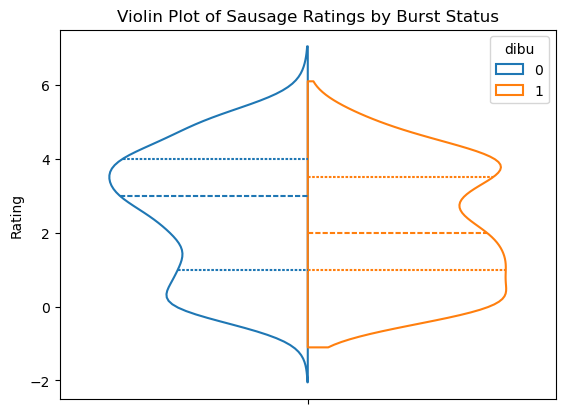

In [142]:
sns.violinplot(data=rated_sausages,
               y='rating_numeric', inner='quart',
               split=True,hue='dibu',
               fill=False)

plt.title('Violin Plot of Sausage Ratings by Burst Status')
plt.ylabel('Rating')
plt.savefig('../visuals/burst_violin_plt.png', format='png')

We can refine this for no outliers that is, just values between 0 and 5. 

Text(0, 0.5, 'Rating')

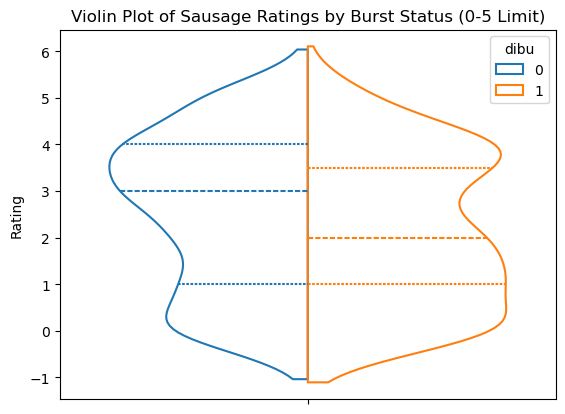

In [141]:
rated_sausages_05 = rated_sausages[(rated_sausages['rating_numeric'] >= 0) & (rated_sausages['rating_numeric'] <= 5)]

sns.violinplot(data=rated_sausages_05,
               y='rating_numeric', inner='quart',
               split=True,hue='dibu',
               fill=False)

plt.title('Violin Plot of Sausage Ratings by Burst Status (0-5 Limit)')
plt.ylabel('Rating')
